In [4]:
import pandas as pd
import numpy as np
from scipy.spatial.transform import Rotation as R

dir="/home/ghaiyan/project/NeRV-3D/IMR90/"
mapping = pd.read_excel(dir+"mapping.xls", sheet_name='Chr22')
fish = pd.read_excel(dir+"chr22.xls")
xyz = np.loadtxt(dir+"chr22_5kb/NeRV-TAD.xyz")
evalFishDir="/home/ghaiyan/project/NeRV-3D/IMR90/Chr22_Fish_eval.txt"
res = 5000

num = len(mapping)
rep = int(len(fish) / len(mapping))

# 计算模型的对应位置值
model = np.zeros((num,3))
for i in range(num):
    start = int(mapping.loc[i,"Start genomic coordinate"] / res)
    end =  int(mapping.loc[i,"End genomic coordinate",] / res)
    model[i] = pd.DataFrame(xyz[start:end,]).mean(axis=0)

# fish的真实数据多次测量的每次误差
for i in range(rep):
    serial = i + 1
    data = fish.loc[fish['Serial # of the imaged chromosome'] == serial,["x(um)","y(um)","z(um)"]]
    data = np.array(data)

    # 删除模型或FISH中没有的点们
    data_new = []
    model_new = []
    for i in range(num):
        if not (np.isnan(model[i,0]) or np.isnan(data[i,0])):
            data_new.append(data[i])
            model_new.append(model[i])

    # center
    data_new = data_new - np.mean(data_new, axis=0)
    model_new = model_new - np.mean(model_new, axis=0)

    # rescale
    data_sum = sum([np.sqrt(np.sum(coord**2)) for coord in data_new])
    model_sum = sum([np.sqrt(np.sum(coord**2)) for coord in model_new])
    scaling_factor = data_sum / model_sum
    model_new = np.array(model_new) * scaling_factor

    # rotate
    estimated_rotation, rmsd = R.align_vectors(data_new,model_new)
    print (rmsd)
    with open(evalFishDir,'a+') as f:
            f.write(str(rmsd)+'\n')
            f.close()



3.8579217104678607
3.7931867156583845
2.7026203936233
3.719735689947917
2.568355578124175
3.1623306643212854
4.238993724038061
3.8379385357690716
3.8069234827398026
4.091674510092175
2.639042612524383
4.311861859650205
3.4590487625975648
2.450577401581782
3.5175252447987133
2.638150275670098
2.7179523561004135
2.4712540967869927
2.74273778506551
3.861954822123439
3.698819889332646
4.232672206493606
3.3807439773814556
3.1937656583122087
4.438064363141139
3.7618205445262194
4.033304419892409
3.9030240398902434
2.311588139520068
2.5221759791724763
3.116347745625752
2.357613969426889
3.6384608754213272
3.983504623430458
3.58747303309549
2.5848993043302415
2.6544339875067497
3.693244270324551
3.989210918323066
2.506953724538264
2.901822867558233
2.9974328989501156
3.4286253651208445
3.776588103955676
3.833429792635853
3.477953268205379
3.376599272145759
4.014361859715127
2.679562960321112
3.2262516419372442
3.02585896517412
3.6389296389232575
3.9827805221273134
4.724525580370129
3.374137733

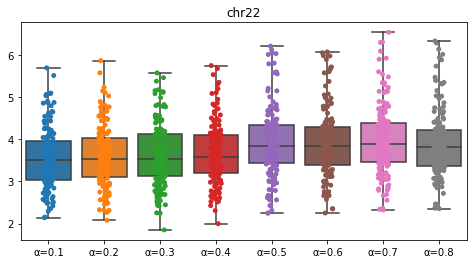

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import pandas as pd
mpl.rcParams['font.size'] = 10
mpl.rcParams['pdf.fonttype']=42
mpl.rcParams['ps.fonttype']=42
dir="/home/ghaiyan/project/NeRV-3D/IMR90/chr22_5kb/"
name = 'chr22'
mapping = pd.read_excel(dir+"chr22-lapha-400-Fish-eval.xlsx", sheet_name=name)
plt.figure(figsize=(8,4))
line = sns.boxplot(data = mapping,whis=2.5)
sns.stripplot(data = mapping)
line.set_title(name)
plt.savefig(dir+'/'+name+'_alpha_400_FISH.pdf',pad_inches=0,bbox_inches='tight')
plt.show() 

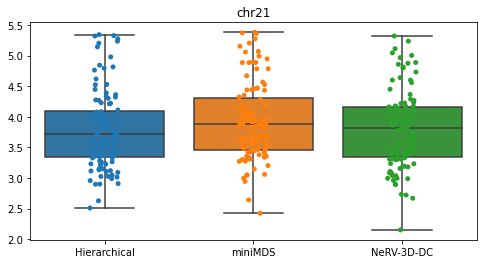

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import pandas as pd
mpl.rcParams['font.size'] = 10
mpl.rcParams['pdf.fonttype']=42
mpl.rcParams['ps.fonttype']=42
name = 'chr21'
dir="/home/ghaiyan/project/NeRV-3D/IMR90/"
mapping = pd.read_excel(dir+"FISHevaluatemethods.xls", sheet_name=name)
plt.figure(figsize=(8,4))
line = sns.boxplot(data = mapping,whis=2.5)
sns.stripplot(data = mapping)
line.set_title(name)
plt.savefig(dir+'/'+name+'FISH-methods.pdf',pad_inches=0,bbox_inches='tight')
plt.show()

In [6]:
import pandas as pd
import numpy as np
from scipy.spatial.transform import Rotation as R


def get_data(method, chr):
    mapping = pd.read_excel(dir+"mapping.xls", sheet_name='Chr'+chr)
    fish = pd.read_excel(dir+"/chr{}.xls".format(chr))
    xyz = np.loadtxt(dir+"/chr{}_5kb/{}.xyz".format(chr,method))
    res = 5000

    num = len(mapping)
    rep = int(len(fish) / len(mapping))

    # 计算模型的对应位置值
    model = np.zeros((num,3))
    for i in range(num):
        start = int(mapping.loc[i,"Start genomic coordinate"] / res)
        end =  int(mapping.loc[i,"End genomic coordinate",] / res)
        model[i] = pd.DataFrame(xyz[start:end,]).mean(axis=0)

    # fish的真实数据多次测量的每次误差
    for i in range(rep):
        serial = i + 1
        data = fish.loc[fish['Serial # of the imaged chromosome'] == serial,["x(um)","y(um)","z(um)"]]
        data = np.array(data)

        # 删除模型或FISH中没有的点们
        data_new = []
        model_new = []
        for i in range(num):
            if not (np.isnan(model[i,0]) or np.isnan(data[i,0])):
                data_new.append(data[i])
                model_new.append(model[i])
        
        # center
        data_new = data_new - np.mean(data_new, axis=0)
        model_new = model_new - np.mean(model_new, axis=0)

        # rescale
        data_sum = np.sum([np.sqrt(np.sum(coord**2)) for coord in data_new])
        model_sum = np.sum([np.sqrt(np.sum(coord**2)) for coord in model_new])
        scaling_factor = data_sum / model_sum
        model_new = np.array(model_new) * scaling_factor

        # rotate
        estimated_rotation, rmsd = R.align_vectors(data_new,model_new)
        model_new = estimated_rotation.apply(model_new)

    return data_new,model_new


chr = "20"
dataH,modelH = get_data("Hierarchical",chr)
dataM,modelM = get_data("miniMDS",chr)
dataN,modelN = get_data("NeRV-TAD",chr)

In [10]:
def distance_error(data,model):
    sum = 0
    for i in range(len(data)):
        for j in range(i+1,len(data)):
            D = np.linalg.norm(data[i] - data[j])
            d = np.linalg.norm(model[i] - model[j])
            sum = sum + (abs(D-d) / D)
    return sum
print(distance_error(dataH,modelH))
print(distance_error(dataM,modelM))
print(distance_error(dataN,modelN))

377.9999999999999
227.03853799432846
231.77807456304694


In [79]:
import pandas as pd
import numpy as np


def get_data(method, chr):
    mapping = pd.read_excel("../IMR90/mapping.xls", sheet_name='Chr'+chr)
    fish = pd.read_excel("../IMR90/chr{}.xls".format(chr))
    xyz = np.loadtxt("../IMR90/chr{}_5kb/{}.xyz".format(chr,method))
    res = 5000

    num = len(mapping)
    rep = int(len(fish) / len(mapping))

    distance_model = np.zeros(num-1)
    # 计算模型的对应位置
    model = np.zeros((num,3))
    for i in range(num):
        start = int(mapping.loc[i,"Start genomic coordinate"] / res)
        end =  int(mapping.loc[i,"End genomic coordinate",] / res)
        model[i] = np.nanmean(xyz[start:end,], axis=0)
    for i in range(num - 1):
        distance_model[i] = np.linalg.norm(model[i] - model[i+1])

    distance = np.zeros((num-1,rep))
    # fish的真实数据相邻两位置之间的距离
    for i in range(rep):
        serial = i + 1
        data = fish.loc[fish['Serial # of the imaged chromosome'] == serial,["x(um)","y(um)","z(um)"]]
        data = np.array(data)

        for j in range(len(data)-1):
            distance[j,i] = np.linalg.norm(data[j] - data[j+1])
    distance_true = np.nanmean(distance,axis=1)

    newtrue=[]
    newmodel=[]
    for i in range(len(distance_model)):
        if not np.isnan(distance_model[i]):
            newtrue.append(distance_true[i])
            newmodel.append(distance_model[i])


    return newtrue,newmodel


chr = "20"
dataH,modelH = get_data("Hierarchical",chr)
dataM,modelM = get_data("miniMDS",chr)
dataN,modelN = get_data("NeRV-TAD",chr)


In [14]:
import pandas as pd
dataH = dataH / np.mean(dataH)
df = pd.DataFrame({"FISH":dataH,"Hierarchical3DGenome":modelH,"miniMDS":modelM,"NETAD":modelN})
print(df.corr())
print(df.corr('spearman'))

ValueError: Per-column arrays must each be 1-dimensional

In [12]:
for i in range(len(dataH)):
    print(dataN[i])

[ 0.72472439 -0.77936521 -0.10397046]
[-0.94952261 -1.36010221 -0.61449546]
[ 1.55043639  0.14350579 -0.18848746]
[ 0.88583939 -0.01853721  0.25540354]
[ 1.49031239 -0.71992921 -0.25914346]
[ 1.46080339 -1.03164521 -0.09440546]
[ 0.52921139 -0.58923721  0.21642254]
[ 1.20288439 -1.44786121 -0.08635046]
[ 0.83827739 -1.64271421  0.02514754]
[ 0.54286839 -1.35768121  0.29241154]
[1.03643539 0.14157079 0.39048454]
[-0.43480861  0.36579979  0.29813954]
[ 1.04929039 -1.59443121 -0.25789546]
[ 0.54995839  0.92623479 -0.16843846]
[ 0.83143039  1.00130779 -0.25311546]
[ 1.22575539  0.72864279 -0.35797246]
[ 0.04996639 -0.51136721  0.53635454]
[0.23393039 0.19014279 0.52406554]
[-1.00730761 -0.38629921  0.23230754]
[ 0.03879339  1.21173079 -0.03086446]
[-1.71281061  2.10453079 -0.84408946]
[-1.33526661  1.41369679  0.06928454]
[-0.92062561  1.11236379 -0.08840846]
[-1.68166361  0.93714279  0.05663454]
[-1.04691461  0.92448979  0.50807754]
[-0.75958661  0.45404579  0.24392954]
[-2.15722961 -0.11

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns;

dataH = dataH / np.mean(dataH)
modelH = modelH / np.mean(modelH)
modelM = modelM / np.mean(modelM)
modelN = modelN / np.mean(modelN)
data = {"FISH":dataH,"Hierarchical3DGenome":modelH,"miniMDS":modelM,"NETAD":modelN}
dataf = pd.DataFrame(data)
axes  = plt.figure(figsize=(5,5))
sns.lineplot(data=dataf)
plt.xlabel("Li-Li+1")
plt.ylabel("distance")
plt.title('FISH result')

plt.show()

ValueError: Per-column arrays must each be 1-dimensional